In [15]:
import os 
import numpy as np 
import matplotlib.pyplot as plt  
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

In [16]:
path = './data/'
train_path = path + 'train/'
valid_path = path + 'test/'

In [17]:
IMG_SHAPE = (48, 48)
number_classes = 7 

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dataset = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMG_SHAPE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_dataset = valid_datagen.flow_from_directory(valid_path,
                                            target_size = IMG_SHAPE,
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


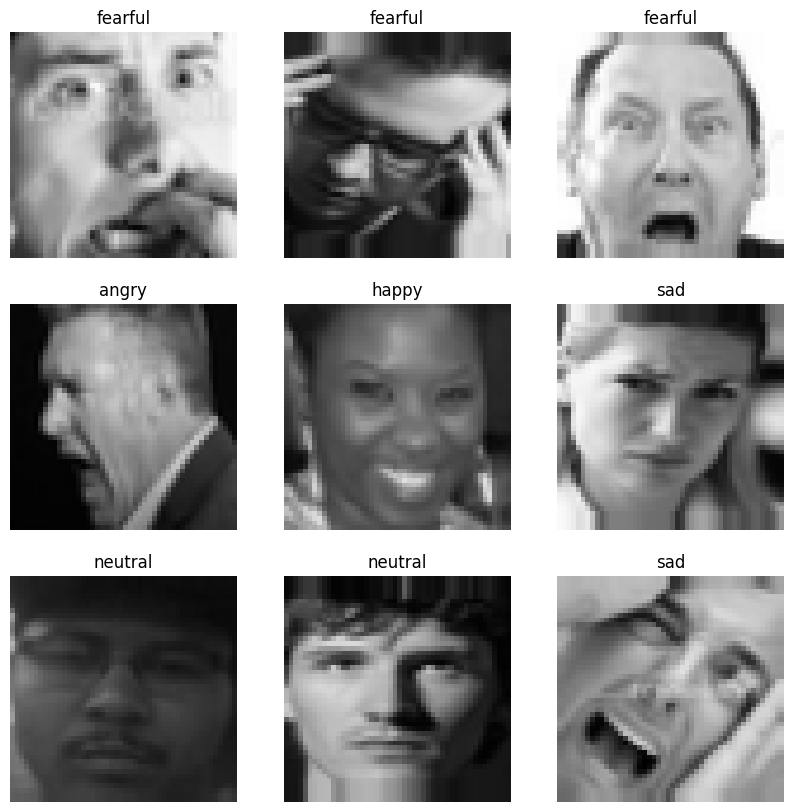

In [19]:
class_names = list(train_dataset.class_indices.keys())
print(class_names)
plt.figure(figsize=(10, 10))
images, labels = train_dataset[0]

print(labels[:10])
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(class_names[np.argmax(labels[i])])
  plt.axis("off")

In [20]:
model = Sequential() 
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = IMG_SHAPE + (3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(number_classes, activation='softmax'))

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [25]:
epochs=10
history = model.fit(x=train_dataset,
                                steps_per_epoch=train_dataset.n//train_dataset.batch_size,
                                epochs=epochs,
                                validation_data = valid_dataset,
                                validation_steps = valid_dataset.n//valid_dataset.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10
897/897 [==============================] - 198s 221ms/step - loss: 1.2288 - accuracy: 0.5331 - val_loss: 1.1522 - val_accuracy: 0.5598 - lr: 1.0000e-04
Epoch 2/10
897/897 [==============================] - 198s 221ms/step - loss: 1.2087 - accuracy: 0.5384 - val_loss: 1.1117 - val_accuracy: 0.5801 - lr: 1.0000e-04
Epoch 3/10
897/897 [==============================] - 200s 223ms/step - loss: 1.1931 - accuracy: 0.5462 - val_loss: 1.0953 - val_accuracy: 0.5924 - lr: 1.0000e-04
Epoch 4/10
897/897 [==============================] - 204s 227ms/step - loss: 1.1768 - accuracy: 0.5522 - val_loss: 1.1383 - val_accuracy: 0.5645 - lr: 1.0000e-04
Epoch 5/10
897/897 [==============================] - 201s 224ms/step - loss: 1.1663 - accuracy: 0.5575 - val_loss: 1.1029 - val_accuracy: 0.5834 - lr: 1.0000e-04
Epoch 6/10
897/897 [==============================] - ETA: 0s - loss: 1.1525 - accuracy: 0.5641Restoring model weights from the end of the best epoch: 3.

Epoch 6: ReduceLROnPlateau red

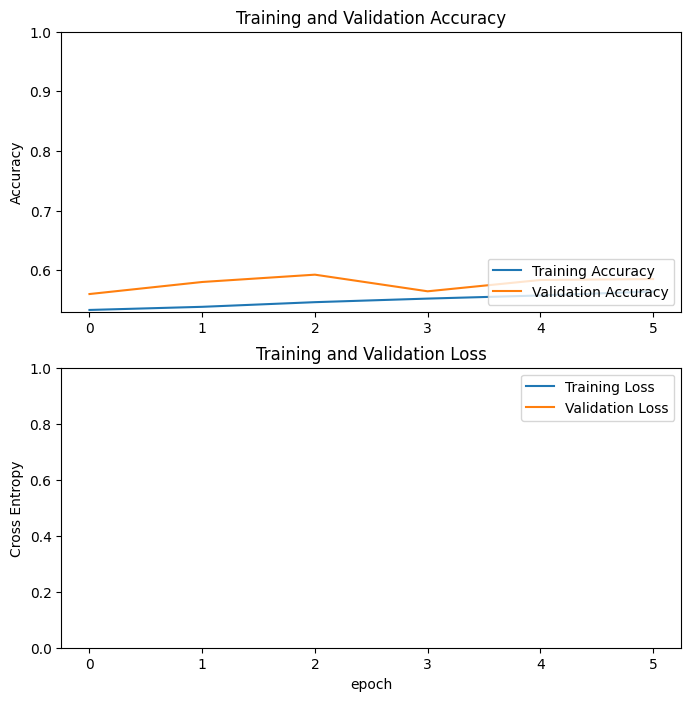

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('model_new.h5')